---
## Which are the best days in the week ?
This notebook reads our cleaned data from the file "output_stage2.csv" and looks at total traffic at the top 10 stations in terms of days of the week.


### 1. Importing packages and magics

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt
import datetime


%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_style("white")

### 2. Reading data 
We read data in from a file -"output_stage2.csv" - which contains cleaned data previous generated

In [4]:
df = pd.read_csv('output_stage2.csv',parse_dates=['DATETIME'])
df.drop('Unnamed: 0',axis =1, inplace = True)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,ENTRY_DIFF,EXIT_DIFF
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,04:00:00,REGULAR,6598864,2235830,2018-04-28 04:00:00,17.0,1.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,08:00:00,REGULAR,6598880,2235863,2018-04-28 08:00:00,16.0,33.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,12:00:00,REGULAR,6598961,2235955,2018-04-28 12:00:00,81.0,92.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,16:00:00,REGULAR,6599175,2236015,2018-04-28 16:00:00,214.0,60.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,20:00:00,REGULAR,6599456,2236074,2018-04-28 20:00:00,281.0,59.0


We have determined the top 10 stations on the network in terms of traffic volumes (exit + entry) and are passing a string with this list. 

In [5]:
stations =[
    '34 ST-PENN STA',
    'GRD CNTRL-42 ST',
    '34 ST-HERALD SQ',
    '23 ST',
    '14 ST-UNION SQ',
    'TIMES SQ-42 ST',
    'FULTON ST',
    '86 ST',
    '42 ST-PORT AUTH',
    '59 ST COLUMBUS',
    '125 ST',]

### 3. Selecting Data and Specific Cleaning

##### Selecting Data 
Selecing only those columns of data that are relavent for our analysis

In [6]:
df_clean = df[['STATION', 'UNIT', 'C/A', 'SCP','DATE','ENTRY_DIFF','EXIT_DIFF']]
df_clean.head()

,STATION,UNIT,C/A,SCP,DATE,ENTRY_DIFF,EXIT_DIFF
0,59 ST,R051,A002,02-00-00,04/28/2018,17.0,1.0
1,59 ST,R051,A002,02-00-00,04/28/2018,16.0,33.0
2,59 ST,R051,A002,02-00-00,04/28/2018,81.0,92.0
3,59 ST,R051,A002,02-00-00,04/28/2018,214.0,60.0
4,59 ST,R051,A002,02-00-00,04/28/2018,281.0,59.0


##### Specific Cleaning
Performing additional specific cleaning. We had previously cleaned and written our Data how ever here I converting the Date column to a DATETIME Object to facilitate ease in further operations

In [7]:
df_clean['DATE'] = pd.to_datetime(df_clean['DATE'], format="%m/%d/%Y")
df_clean.head()

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,STATION,UNIT,C/A,SCP,DATE,ENTRY_DIFF,EXIT_DIFF
0,59 ST,R051,A002,02-00-00,2018-04-28,17.0,1.0
1,59 ST,R051,A002,02-00-00,2018-04-28,16.0,33.0
2,59 ST,R051,A002,02-00-00,2018-04-28,81.0,92.0
3,59 ST,R051,A002,02-00-00,2018-04-28,214.0,60.0
4,59 ST,R051,A002,02-00-00,2018-04-28,281.0,59.0


##### Specific Cleaning
Pulling up all rows that are relevant - i.e. rows that correspond to our top 10 stations. 

In [8]:
station_data = df_clean.loc[df_clean['STATION'].isin(stations),['STATION','DATE','ENTRY_DIFF','EXIT_DIFF']]
station_data.head()

,STATION,DATE,ENTRY_DIFF,EXIT_DIFF
2139,TIMES SQ-42 ST,2018-04-28,116.0,72.0
2140,TIMES SQ-42 ST,2018-04-28,89.0,287.0
2141,TIMES SQ-42 ST,2018-04-28,281.0,963.0
2142,TIMES SQ-42 ST,2018-04-28,406.0,1102.0
2143,TIMES SQ-42 ST,2018-04-28,544.0,989.0


### 4. Grouping Data
##### Grouping data to find out the volumes for a given station on a particular date
We sum up all the ENTRY_DIFF and EXIT_DIFF values for each unique day at a station

In [9]:
station_data =station_data.groupby(['STATION','DATE']).sum().reset_index()
station_data.head()

,STATION,DATE,ENTRY_DIFF,EXIT_DIFF
0,125 ST,2018-04-28,45780.0,40264.0
1,125 ST,2018-04-29,45127.0,42489.0
2,125 ST,2018-04-30,74077.0,58231.0
3,125 ST,2018-05-01,77733.0,61216.0
4,125 ST,2018-05-02,77929.0,62470.0


##### Grouping data to find out the volumes for a specific day of the week
We take a mean() of all the ENTRY_DIFF and EXIT_DIFF values for each day of the week at a station.
Use datetime.dt.weekday to get an integer from 0 to 6 which is monday - sunday

In [10]:
station_data = (station_data
                .groupby(['STATION',station_data['DATE'].dt.weekday])
                .mean()
                .reset_index()
               )
station_data.head(10)

,STATION,DATE,ENTRY_DIFF,EXIT_DIFF
0,125 ST,0,70230.000000,55097.076923
1,125 ST,1,75647.923077,59241.615385
2,125 ST,2,73951.076923,59064.384615
3,125 ST,3,76715.846154,60348.384615
4,125 ST,4,76099.384615,61333.384615
5,125 ST,5,51624.769231,45949.846154
6,125 ST,6,43519.384615,38754.307692
7,14 ST-UNION SQ,0,93794.615385,83263.538462
8,14 ST-UNION SQ,1,104162.923077,89801.307692
9,14 ST-UNION SQ,2,104804.307692,89365.692308


### 5. Visualize it 
And now the fun part we get to visualize our data using a simple line plot 
1. We setup a marker string with proper days of the week to use as our x axis ticks
2. We setup figure and subplot to return an axis
3. We cycle through our data using our inputed list of station to plot each line 
4. Format

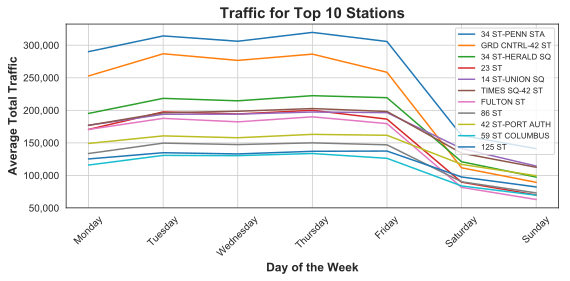

In [11]:
# 1. Human readable markers
markers = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# 2. Return Axis
fig, ax = plt.subplots(figsize=[8,4])

# 3. Plot one line for each station
for station in stations:
    data = station_data.loc[station_data['STATION']==station,:] # select one station
    plt.plot(data['DATE'],data['ENTRY_DIFF']+data['EXIT_DIFF']) # plot it
    
# 4. Format
# grids 
plt.grid()
# x and y axis marking
ticks_x = np.linspace(0, 6, 7)
plt.xticks(ticks_x, markers, rotation=45);
# quick way to insert , seperators for large number -- 100,000 instead of 100000
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
)

#labels,titles, legend 
plt.ylabel("Average Total Traffic",fontsize = 12, weight = 'bold')
plt.xlabel("Day of the Week",fontsize = 12, weight = 'bold')
plt.title("Traffic for Top 10 Stations",fontsize = 15, weight = 'bold')
plt.legend(stations, loc = 'upper right', fontsize=8);
plt.tight_layout()

# to save graphic -- uncomment if you need to save image
#plt.savefig('Traffic for top 10 stations.pdf',format='pdf',transparent=True)

### 6. Observations

1. Traffic drops significantly on the weekends
2. Weekdays are always better for marketing
3. Thursdays show a lightly higher traffic volume 

---

### Next -> heatmap.ipynb